In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df_HPC = pd.read_csv('00_data/HPC1.csv', names = ['HPC'])
df_PFC = pd.read_csv('00_data/PFC1.csv', names = ['PFC'])
df_EMG = pd.read_csv('00_data/EMG1.csv', names = ['EMG'])

df = pd.concat([df_HPC, df_PFC,df_EMG], axis=1)
df.head()

,HPC,PFC,EMG
0,-5.836571,9.003894,0.506779
1,59.422057,77.620067,0.506780
2,-42.925064,-45.459779,0.506785
3,49.265049,115.321417,0.506792
4,70.679527,80.468220,0.506802


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

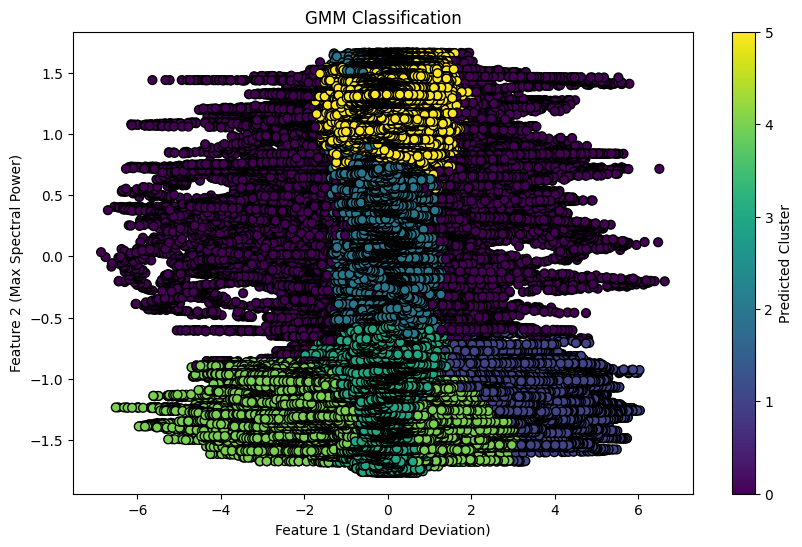

GMM Weights:
 [0.0536491  0.02341118 0.34108655 0.19652198 0.14327817 0.24205302]

GMM Means:
 [[ 0.01807773 -0.05952782  0.47404174]
 [ 0.84245071  3.34787251 -1.18974799]
 [-0.12738686 -0.07340999  0.46592319]
 [-0.06167981 -0.10926041 -1.13354431]
 [-0.10858554 -0.33160701 -1.30194804]
 [ 0.20837048  0.07783108  1.04443425]]


In [4]:
# 3. Create and Fit the GMM
# we specify n_components=3 because we have 3 types of signals
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# 4. Predict Clusters
labels = gmm.predict(X_scaled)

# 5. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis', s=40, edgecolors='k')
plt.title("GMM Classification")
plt.xlabel("Feature 1 (Standard Deviation)")
plt.ylabel("Feature 2 (Max Spectral Power)")
plt.colorbar(label='Predicted Cluster')
plt.show()

print("GMM Weights:\n", gmm.weights_)
print("\nGMM Means:\n", gmm.means_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_signals_with_labels(X_raw, labels, title="Classification des Signaux"):
    """
    Affiche les 3 signaux originaux colorés par les labels trouvés par l'IA.
    """
    # On s'assure que X_raw est un DataFrame pour faciliter la manipulation
    df = pd.DataFrame(X_raw, columns=['Signal_1', 'Signal_2', 'Signal_3'])
    df['Label'] = labels
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
    colors = sns.color_palette("viridis", as_cmap=False, n_colors=len(np.unique(labels)))
    
    for i, col in enumerate(['Signal_1', 'Signal_2', 'Signal_3']):
        # On trace le signal original
        # Note: Pour un affichage clair par "sous-classe", on peut utiliser un scatter plot 
        # ou colorer les segments. Ici, le scatter est le plus précis pour voir les clusters.
        sns.scatterplot(
            ax=axes[i],
            x=df.index,
            y=df[col],
            hue=df['Label'],
            palette=colors,
            legend=(i == 0), # Légende seulement sur le premier graphique
            s=10,
            edgecolor=None
        )
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)

    plt.suptitle(title)
    plt.xlabel("Temps / Index")
    plt.tight_layout()
    plt.show()

In [12]:
X_scaled

array([[-0.33424834, -0.25996986,  0.22132114],
       [ 0.3384346 ,  0.11793719,  0.22132681],
       [-0.71655482, -0.5599313 ,  0.2213427 ],
       ...,
       [-0.27408523, -0.30955927,  1.32261323],
       [-0.27408523, -0.30955927,  1.32260803],
       [-0.27408523, -0.30955927,  1.3226062 ]], shape=(1342539, 3))

C:\Users\Pc\AppData\Local\Temp\ipykernel_6624\3489559462.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Pc\anaconda\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


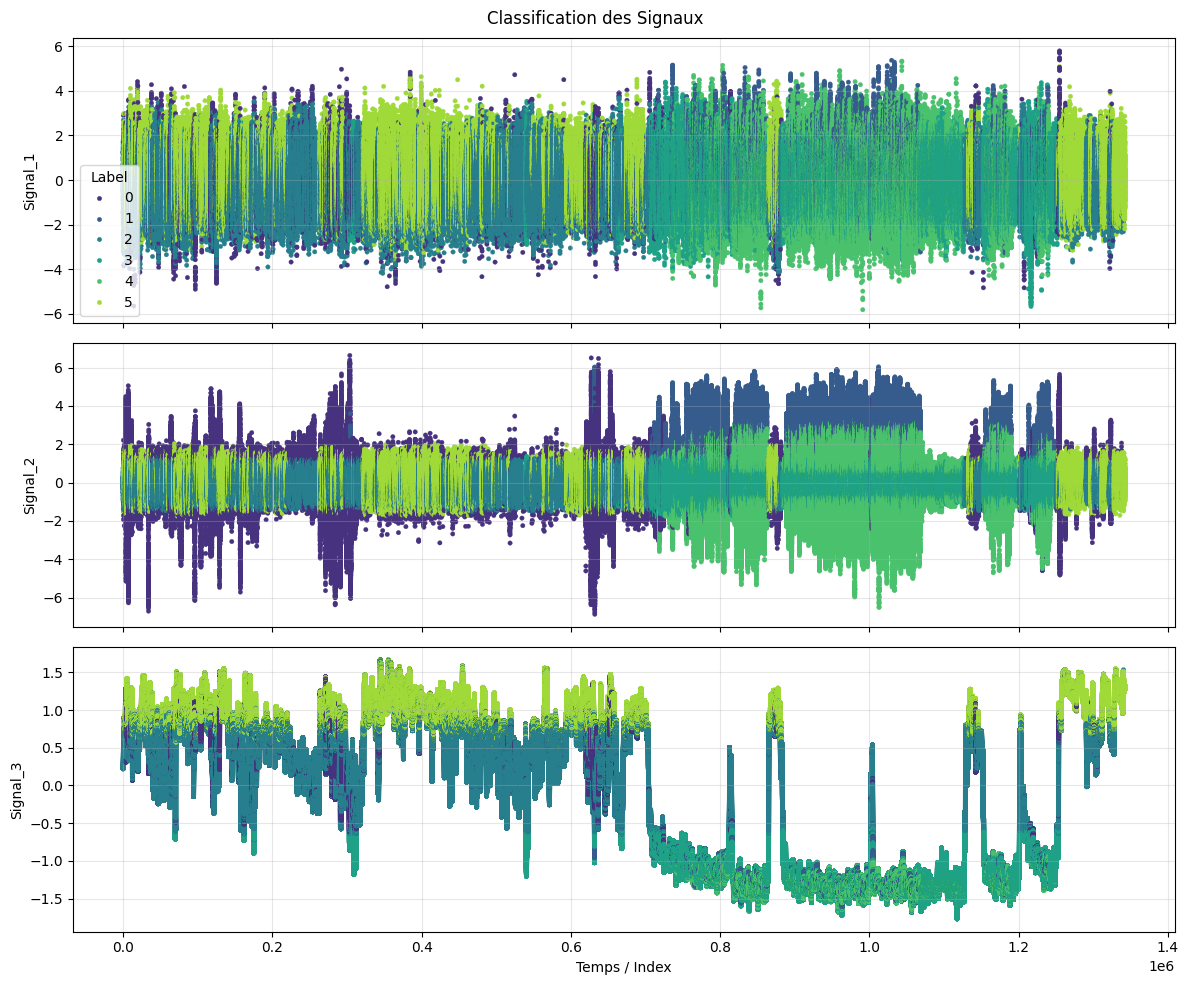

In [13]:
plot_signals_with_labels ( X_scaled  , labels)